<a href="https://colab.research.google.com/github/TyaraKusumaNevada/PCVK_Genap_2025/blob/main/Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

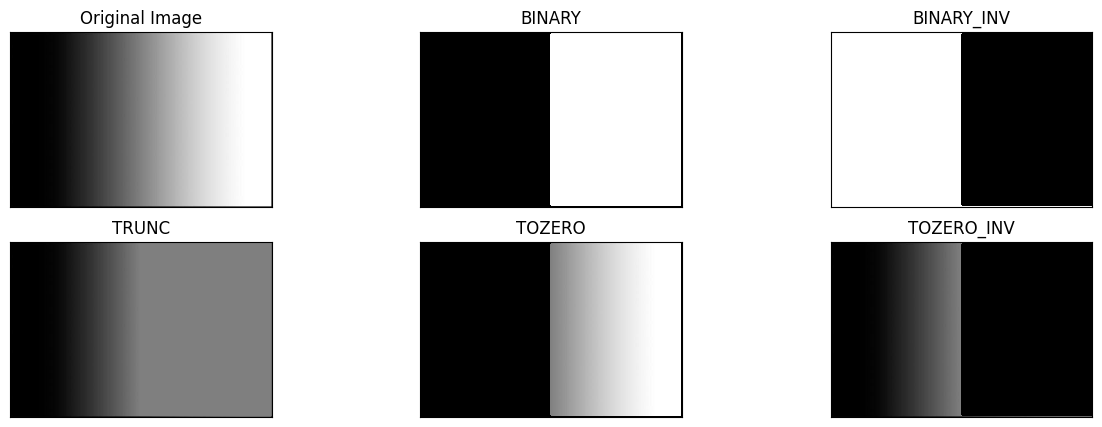

In [1]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
filename = ('/content/gradient.jpg')

 # Gambar bisa disesuaikan
img = cv.imread(filename)
thresh = 127 #nilai Threshold yang ditentukan
#1. thresh1 jika pixel di img>127, maka thresh1 bernilai 1(putih) selain itu bernilai 0(hitam)
ret,thresh1 = cv.threshold(img,thresh,255,cv.THRESH_BINARY)
#2. thresh2 adalah binary threshold inverse
ret,thresh2 = cv.threshold(img,thresh,255,cv.THRESH_BINARY_INV)
#3. Threshold Truncate
ret,thresh3 = cv.threshold(img,thresh,255,cv.THRESH_TRUNC)
#4. Threshold Tozero
ret,thresh4 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO)
#5. Threshold Tozero Inverse
ret,thresh5 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize = (15,5))
for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

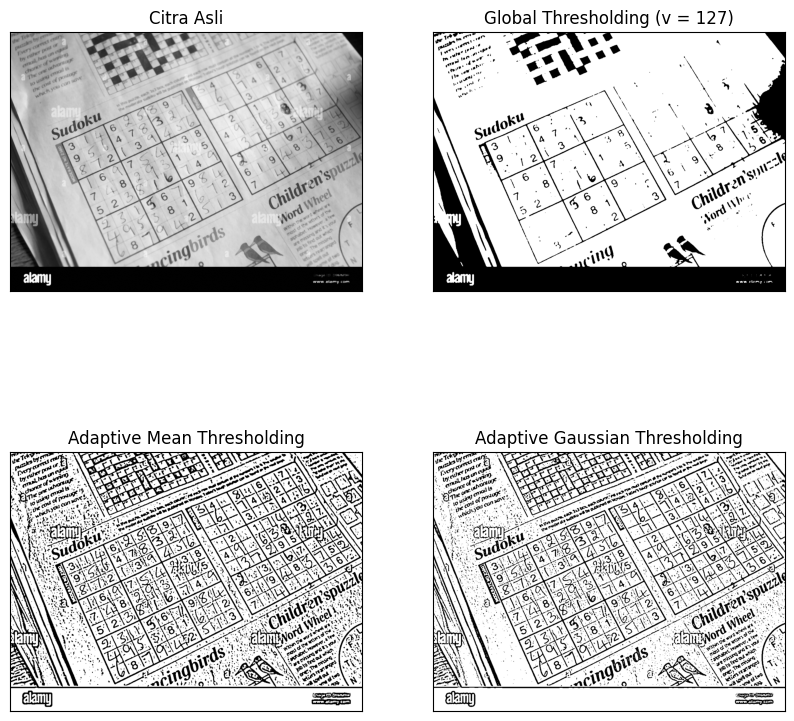

In [2]:
filename = ('/content/sudoku.jpg')
citra = cv.medianBlur(cv.imread(filename),5)
gray = cv.cvtColor(citra, cv.COLOR_BGR2GRAY)
#gray = cv.medianBlur(gray,5)
thresh = 127
ret,th1 = cv.threshold(gray,thresh,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_MEAN_C, cv
.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C
, cv.THRESH_BINARY,11,2)
titles = ['Citra Asli', 'Global Thresholding (v = 127)', 'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
citra2 = [gray, th1, th2, th3]
plt.figure(figsize = (10,10))
for i in range(len(citra2)):
  plt.subplot(2,2,i+1),plt.imshow(citra2[i],'gray')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()


/tmp/ipython-input-1235767485.py:12: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.subplot(2,2,1),plt.hist(blur.ravel(),256,[50,200])


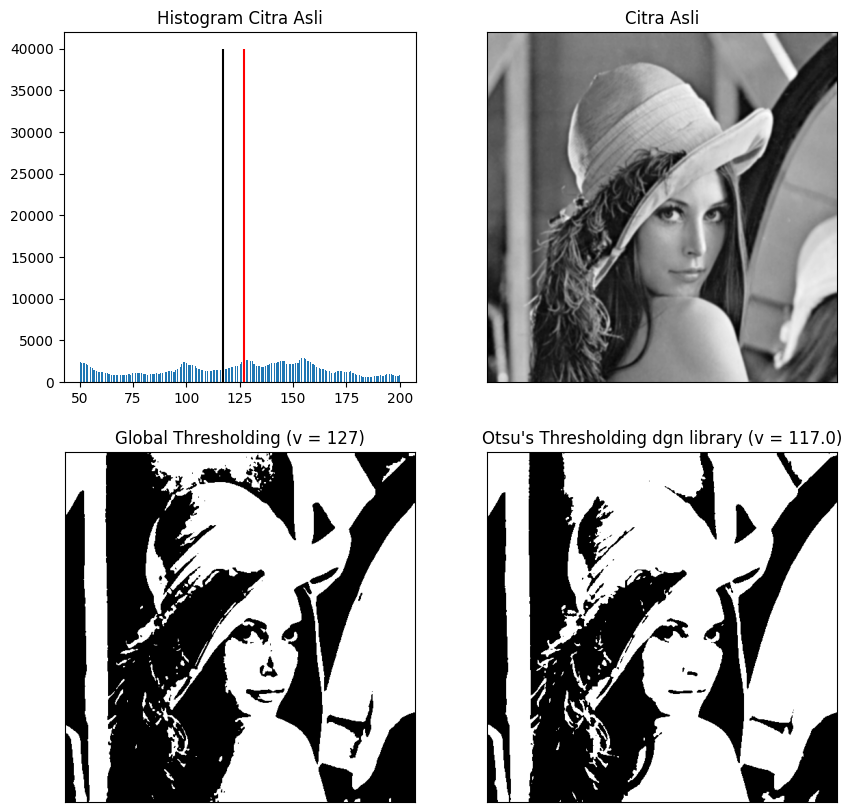

In [3]:
# Dengan Library
filename = ('/content/lena.jpg')
img = cv.imread(filename,0)
blur = cv.GaussianBlur(img,(5,5),0)
thresh = 127
ret,th1 = cv.threshold(blur,thresh,255,cv.THRESH_BINARY)
ret2,th2 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
x = ("Otsu's Thresholding dgn library (v = ")+str(ret2)+")"
titles = ['Citra Asli', 'Global Thresholding (v = 127)', x]
citra3 = [blur, th1, th2]
plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.hist(blur.ravel(),256,[50,200])
plt.vlines(ret,0,40000,colors='red')
#garis vertikal merah menunjukan threshold global 127
plt.vlines(ret2,0,40000,colors='black') #garis vertikal hitam
#menunjukkan threshold 92 hasil otsu's
plt.title('Histogram Citra Asli')
for i in range(len(citra3)):
    plt.subplot(2,2,i+2),plt.imshow(citra3[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

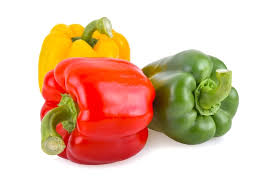

In [4]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
# Assuming the image file exists at the given path
filename = ('/content/peppers.jpg')
img = cv.imread(filename)
if img is not None:
    # Use cv2_imshow to display the image in Colab
    cv2_imshow(img)
else:
    print("Error: Could not load image from path:", filename)

Klaster ke-2 terdeteksi sebagai kuning: [250 190   7]


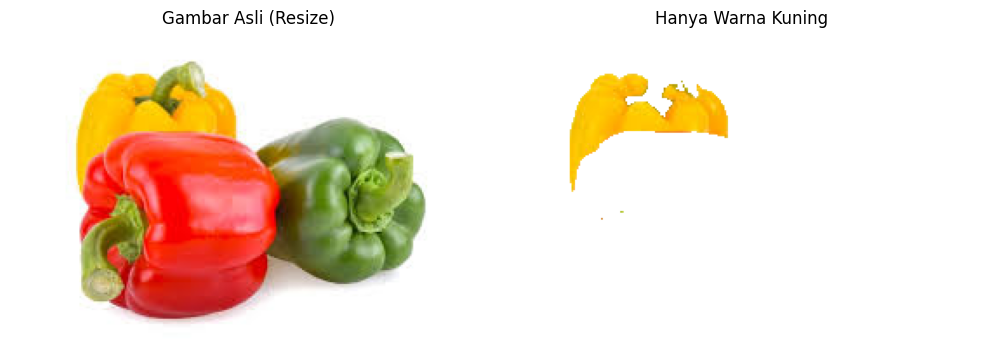

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Langkah 2: Mount Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

# Langkah 3: Baca gambar dari file path
file_path = "/content/peppers.jpg"
img = cv2.imread(file_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# img_small = cv2.resize(img_rgb, (100, 100)) # resize untuk proses clustering

# Langkah 4: K-Means Clustering
pixels = img_rgb.reshape(-1, 3)
k = 5  # jumlah klaster warna
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(pixels)
cluster_centers = kmeans.cluster_centers_.astype(int)
labels = kmeans.labels_

# Langkah 5: Cari klaster yang mendekati warna kuning
def is_yellow(color):
    r, g, b = color
    return r > 150 and g > 150 and b < 100  # logika sederhana warna kuning

yellow_cluster = None
for idx, center in enumerate(cluster_centers):
    if is_yellow(center):
        yellow_cluster = idx
        print(f"Klaster ke-{idx} terdeteksi sebagai kuning: {center}")
        break

if yellow_cluster is None:
    print("Tidak ditemukan klaster warna kuning.")
else:
    # Langkah 6: Buat gambar hanya dengan warna kuning
    mask = (kmeans.labels_ == yellow_cluster)
    yellow_pixels = np.zeros_like(pixels)
    yellow_pixels[mask] = pixels[mask]
    yellow_img = yellow_pixels.reshape(img_rgb.shape)

    # Ubah latar belakang hitam jadi putih
    white_bg = yellow_img.copy()
    white_bg[np.all(white_bg == [0, 0, 0], axis=-1)] = [255, 255, 255]

    # Tampilkan gambar asli dan hasil filter kuning
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(img_rgb)
    axes[0].set_title("Gambar Asli (Resize)")
    axes[0].axis('off')
    axes[1].imshow(white_bg)
    axes[1].set_title("Hanya Warna Kuning")
    axes[1].axis('off')
    plt.tight_layout()
    plt.show()


In [ ]:
import cv2
import matplotlib.pyplot as plt

# 1. Membaca citra Lena dalam mode grayscale
filename = ('/content/lena.jpg')
image = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

# 2. Pastikan gambar berhasil dibaca
if image is None:
    print("Gambar tidak ditemukan. Pastikan file 'lena.png' ada di direktori kerja.")
else:
    # --- Metode 1: Threshold tetap 128 ---
    threshold_value = 128
    _, segmented_fixed = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)

    # --- Metode 2: Otsu Thresholding ---
    otsu_value, segmented_otsu = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # 3. Tampilkan hasil segmentasi
    plt.figure(figsize=(15,6))

    # Gambar asli
    plt.subplot(2,3,1)
    plt.imshow(image, cmap='gray')
    plt.title('Citra Asli (Lena)')
    plt.axis('off')

    # Segmentasi Threshold 128
    plt.subplot(2,3,2)
    plt.imshow(segmented_fixed, cmap='gray')
    plt.title(f'Threshold Tetap = {threshold_value}')
    plt.axis('off')

    # Segmentasi Otsu
    plt.subplot(2,3,3)
    plt.imshow(segmented_otsu, cmap='gray')
    plt.title(f'Otsu Threshold = {otsu_value:.2f}')
    plt.axis('off')

    # Histogram citra asli
    plt.subplot(2,1,2)
    plt.hist(image.ravel(), bins=256, range=(0,256), color='gray')
    plt.axvline(x=threshold_value, color='blue', linestyle='--', label=f'Threshold 128')
    plt.axvline(x=otsu_value, color='red', linestyle='--', label=f'Otsu = {otsu_value:.2f}')
    plt.title('Histogram Intensitas Piksel dan Nilai Ambang')
    plt.xlabel('Nilai Intensitas')
    plt.ylabel('Jumlah Piksel')
    plt.legend()
    plt.tight_layout()
    plt.show()
